In [21]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt #matplotlib
import numpy as np #numpy
import pandas as pd #pandas
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from pandas.tools.plotting import scatter_matrix
from scipy import stats

In [2]:
# Import file
acounts = pd.read_csv('2017_07_14-ArticleCountsperJournal.txt', sep='\t')
# remove duplicate rows (except for first occurrence)
acounts.drop_duplicates(keep='first', inplace=True)

In [3]:
acounts.head(3)

,ISSN,journal_name,citation_count,journal_id,paper_count
0,2450-5102,hungarian journal of industrial chemistry,8,112891560,9
1,2093-6214,journal of pharmaceutical investigation,551,70884739,1590
2,1475-2867,cancer cell international,4612,130214813,762


In [4]:
#Import file
aiscores = pd.read_csv('api_influence7-20-17.csv', sep=",")

In [5]:
aiscores.head(3)

,id,article_influence,est_article_influence,date_stamp,journal_id,ai_percentile,cost_effectiveness,ef_percentile,eigenfactor,efn
0,144,0.37613,NaN,2007-12-31,0187-6236,NaN,NaN,NaN,NaN,NaN
1,145,1.27820,NaN,2007-12-31,0021-9150,NaN,NaN,NaN,NaN,NaN
2,146,1.33810,NaN,2007-12-31,1478-6362,NaN,NaN,NaN,NaN,NaN


In [6]:
# Find all the 2015 ai scores
ai2015 = aiscores.loc[aiscores['date_stamp'] == '2015-12-31']

In [7]:
ai2015.head(2)

,id,article_influence,est_article_influence,date_stamp,journal_id,ai_percentile,cost_effectiveness,ef_percentile,eigenfactor,efn
5716,5860,12.463,NaN,2015-12-31,1433-8351,NaN,NaN,NaN,NaN,NaN
5717,5861,5.459,NaN,2015-12-31,1369-7021,NaN,NaN,NaN,NaN,NaN


In [8]:
# Create a new dataframe that merges acounts and ai2015
merged = pd.merge(acounts, ai2015, left_on='ISSN', right_on='journal_id')

In [9]:
merged.head(5)

,ISSN,journal_name,citation_count,journal_id_x,paper_count,id,article_influence,est_article_influence,date_stamp,journal_id_y,ai_percentile,cost_effectiveness,ef_percentile,eigenfactor,efn
0,1475-2867,cancer cell international,4612,130214813,762,6102,0.588,NaN,2015-12-31,1475-2867,NaN,NaN,NaN,NaN,NaN
1,1744-9081,behavioral and brain functions,18785,202417740,579,6187,0.693,NaN,2015-12-31,1744-9081,NaN,NaN,NaN,NaN,NaN
2,1944-3277,standards in genomic sciences,2016,174963459,615,6439,0.422,NaN,2015-12-31,1944-3277,NaN,NaN,NaN,NaN,NaN
3,1476-072X,international journal of health geographics,26592,28612791,684,6034,1.010,NaN,2015-12-31,1476-072X,NaN,NaN,NaN,NaN,NaN
4,1436-4522,educational technology & society,17076,187377680,2168,6318,0.384,NaN,2015-12-31,1436-4522,NaN,NaN,NaN,NaN,NaN


In [10]:
# Add a column that calculates the average citations per paper per journal
merged['avg_cites_per_paper'] = merged['citation_count'] / merged['paper_count']

In [11]:
merged.head(3)

,ISSN,journal_name,citation_count,journal_id_x,paper_count,id,article_influence,est_article_influence,date_stamp,journal_id_y,ai_percentile,cost_effectiveness,ef_percentile,eigenfactor,efn,avg_cites_per_paper
0,1475-2867,cancer cell international,4612,130214813,762,6102,0.588,NaN,2015-12-31,1475-2867,NaN,NaN,NaN,NaN,NaN,6.052493
1,1744-9081,behavioral and brain functions,18785,202417740,579,6187,0.693,NaN,2015-12-31,1744-9081,NaN,NaN,NaN,NaN,NaN,32.443869
2,1944-3277,standards in genomic sciences,2016,174963459,615,6439,0.422,NaN,2015-12-31,1944-3277,NaN,NaN,NaN,NaN,NaN,3.278049


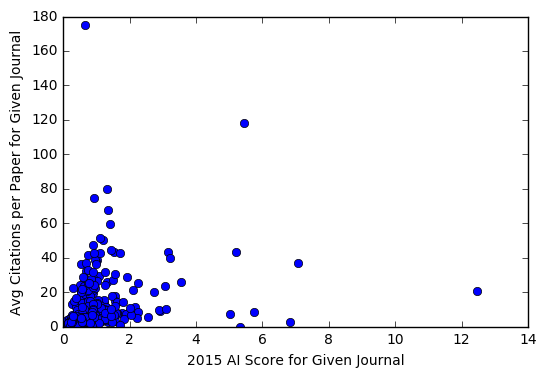

In [12]:
# Quick plot of article influence score and average citations per paper per journal
plt.plot(merged['article_influence'], merged['avg_cites_per_paper'], 'o')
plt.xlabel('2015 AI Score for Given Journal')
plt.ylabel('Avg Citations per Paper for Given Journal')

plt.savefig('ai_avg_citation_scatterplot.jpg')

In [13]:
# Which journal has the max average citations per paper?
merged.loc[merged['avg_cites_per_paper'].idxmax()]

ISSN                                      1556-276X
journal_name             nanoscale research letters
citation_count                               691173
journal_id_x                               55093224
paper_count                                    3948
id                                             6087
article_influence                             0.672
est_article_influence                           NaN
date_stamp                               2015-12-31
journal_id_y                              1556-276X
ai_percentile                                   NaN
cost_effectiveness                              NaN
ef_percentile                                   NaN
eigenfactor                                     NaN
efn                                             NaN
avg_cites_per_paper                         175.069
Name: 230, dtype: object

In [14]:
# Which journal has the max article influence score?
merged.loc[merged['article_influence'].idxmax()]

ISSN                                        1433-8351
journal_name             living reviews in relativity
citation_count                                   2007
journal_id_x                                110783047
paper_count                                        97
id                                               5860
article_influence                              12.463
est_article_influence                             NaN
date_stamp                                 2015-12-31
journal_id_y                                1433-8351
ai_percentile                                     NaN
cost_effectiveness                                NaN
ef_percentile                                     NaN
eigenfactor                                       NaN
efn                                               NaN
avg_cites_per_paper                           20.6907
Name: 75, dtype: object

In [23]:
# Check linear regression results
stats.linregress(merged['article_influence'], merged['avg_cites_per_paper'])

LinregressResult(slope=4.0835852489503166, intercept=7.566289282849195, rvalue=0.27872078724894739, pvalue=1.01518940477298e-07, stderr=0.75103171798427193)

In [24]:
# Read in new file
citation_counts_by_year = pd.read_csv('2017_07_14-year_jid_count.txt', header=None, 
                                      sep=' ', names=['year', 'journal_id', 'citation_count'])
# remove duplicate rows (except for first occurrence)
citation_counts_by_year.drop_duplicates(keep='first', inplace=True)

In [25]:
citation_counts_by_year.tail(5)

,year,journal_id,citation_count
19660,2011,179257517,47
19661,2012,179257517,69
19662,2013,179257517,105
19663,2014,179257517,165
19664,2015,179257517,43


In [26]:
#Read in file
paper_counts_by_year = pd.read_csv('2017_07_20-papers_per_year.txt', sep=' ')
# remove duplicate rows (except for first occurrence)
paper_counts_by_year.drop_duplicates(keep='first', inplace=True)

In [27]:
paper_counts_by_year.head(5)

,year,journal_id,paper_count
0,2010,124795565,891
1,2011,124795565,880
2,2012,124795565,854
3,2013,124795565,869
4,2014,124795565,717


In [28]:
# Outer join the dataframes on journal_id and year, introducing NAs if necessary
by_year_merged = pd.merge(citation_counts_by_year, paper_counts_by_year, on=('journal_id','year'), how='outer')

In [29]:
by_year_merged.head(10)

,year,journal_id,citation_count,paper_count
0,2010,166203837,1447.0,NaN
1,2011,166203837,1676.0,NaN
2,2012,166203837,1813.0,NaN
3,2013,166203837,2007.0,NaN
4,2014,166203837,2078.0,NaN
5,2015,166203837,1458.0,NaN
6,2010,72004196,135.0,NaN
7,2011,72004196,173.0,NaN
8,2012,72004196,211.0,NaN
9,2013,72004196,335.0,NaN


In [30]:
# Left join with acounts df
by_year_merged = pd.merge(by_year_merged, acounts[['journal_id', 'ISSN','journal_name']], on='journal_id', how='left')

In [31]:
# save to csv
by_year_merged.to_csv('counts_by_year.csv', sep=',')

In [32]:
# create new column of average citations per paper per journal
by_year_merged['avg_cites_per_paper'] = by_year_merged['citation_count'] / by_year_merged['paper_count']

In [33]:
by_year_merged.head(10)

,year,journal_id,citation_count,paper_count,ISSN,journal_name,avg_cites_per_paper
0,2010,166203837,1447.0,NaN,0001-527X,acta biochimica polonica,NaN
1,2011,166203837,1676.0,NaN,0001-527X,acta biochimica polonica,NaN
2,2012,166203837,1813.0,NaN,0001-527X,acta biochimica polonica,NaN
3,2013,166203837,2007.0,NaN,0001-527X,acta biochimica polonica,NaN
4,2014,166203837,2078.0,NaN,0001-527X,acta biochimica polonica,NaN
5,2015,166203837,1458.0,NaN,0001-527X,acta biochimica polonica,NaN
6,2010,72004196,135.0,NaN,0003-0090,bulletin of the american museum of natural his...,NaN
7,2011,72004196,173.0,NaN,0003-0090,bulletin of the american museum of natural his...,NaN
8,2012,72004196,211.0,NaN,0003-0090,bulletin of the american museum of natural his...,NaN
9,2013,72004196,335.0,NaN,0003-0090,bulletin of the american museum of natural his...,NaN


In [34]:
# Create a pivot table to show sum of citation counts, sum of paper counts, and number of years 
# included for each journal
counts_pivot_table = pd.pivot_table(by_year_merged, 
                                 index=['journal_name', 'ISSN'],
                                    values=['citation_count', 'paper_count'],
                                    aggfunc=[np.sum, len], margins=True)
counts_pivot_table.head(5)

sum              \
                                        citation_count paper_count   
journal_name                  ISSN                                   
3d research                   2092-6731          249.0       175.0   
aaps pharmscitech             1530-9932        12172.0      1113.0   
aba journal                   2275-6639            1.0         1.0   
abstract and applied analysis 1687-0409         6723.0      4805.0   
academic psychiatry           1545-7230         2729.0      1735.0   

                                                   len              
                                        citation_count paper_count  
journal_name                  ISSN                                  
3d research                   2092-6731            6.0         6.0  
aaps pharmscitech             1530-9932            6.0         6.0  
aba journal                   2275-6639            2.0         2.0  
abstract and applied analysis 1687-0409            6.0         6.0  
academic psychiatry           1545-7230            6.0         6.0

In [35]:
# sum and len will now become rows
counts_pivot_table = counts_pivot_table.stack(level=0)

In [36]:
# create new column with average citation count per paper per journal over the 6 years
counts_pivot_table['avg_cites_per_paper'] = counts_pivot_table['citation_count'] / counts_pivot_table['paper_count']

In [37]:
# unstack and place sum and len back in columns
counts_pivot_table = counts_pivot_table.unstack()

In [38]:
# Flatten pivot table for easier indexing
counts_pivot_table.columns = counts_pivot_table.columns.to_series().str.join('_')

In [39]:
# Keep only specific columns
counts_pivot_table = counts_pivot_table[['citation_count_sum', 'citation_count_len', 'paper_count_sum', 'avg_cites_per_paper_sum']]

In [40]:
# Rename certain columns
counts_pivot_table.rename(columns={'citation_count_len': 'number_years_captured',
                                   'avg_cites_per_paper_sum': 'avg_cites_per_paper'}, inplace=True)
# Remove row #2 (total over all journals) not needed
counts_pivot_table = counts_pivot_table.drop(counts_pivot_table.index[1])

In [41]:
# Reset the index
counts_pivot_table = counts_pivot_table.reset_index()
counts_pivot_table.head(5)

,journal_name,ISSN,citation_count_sum,number_years_captured,paper_count_sum,avg_cites_per_paper
0,3d research,2092-6731,249.0,6.0,175.0,1.422857
1,aaps pharmscitech,1530-9932,12172.0,6.0,1113.0,10.936208
2,aba journal,2275-6639,1.0,2.0,1.0,1.000000
3,abstract and applied analysis,1687-0409,6723.0,6.0,4805.0,1.399168
4,academic psychiatry,1545-7230,2729.0,6.0,1735.0,1.572911


In [42]:
# Need to add article influence data - join ai2015 table
pivot_table_merged = pd.merge(counts_pivot_table, ai2015[['article_influence', 'journal_id']], 
                              left_on='ISSN', right_on='journal_id')
# Only keep rows in which year == 6 (this will remove newer or short-lived journals)
pivot_table_merged = pivot_table_merged.loc[pivot_table_merged['number_years_captured'] == 6.0]
pivot_table_merged

,journal_name,ISSN,citation_count_sum,number_years_captured,paper_count_sum,avg_cites_per_paper,article_influence,journal_id
0,acta bioethica,1726-569X,135.0,6.0,490.0,0.275510,0.030,1726-569X
1,acta botanica croatica,0365-0588,645.0,6.0,209.0,3.086124,0.181,0365-0588
2,acta medica okayama,0386-300X,2625.0,6.0,325.0,8.076923,0.230,0386-300X
3,acta medica portuguesa,1646-0758,964.0,6.0,979.0,0.984678,0.112,1646-0758
4,acta neurobiologiae experimentalis,0065-1400,4243.0,6.0,604.0,7.024834,0.506,0065-1400
5,acta scientiarum-agronomy,1807-8621,832.0,6.0,1131.0,0.735632,0.307,1807-8621
6,acta zoologica academiae scientiarum hungaricae,1217-8837,69.0,6.0,9.0,7.666667,0.187,1217-8837
7,adansonia,1280-8571,157.0,6.0,139.0,1.129496,0.193,1280-8571
8,advances in difference equations,1687-1847,2610.0,6.0,1590.0,1.641509,0.113,1687-1847
9,advances in mechanical engineering,1687-8140,1091.0,6.0,2160.0,0.505093,0.198,1687-8140


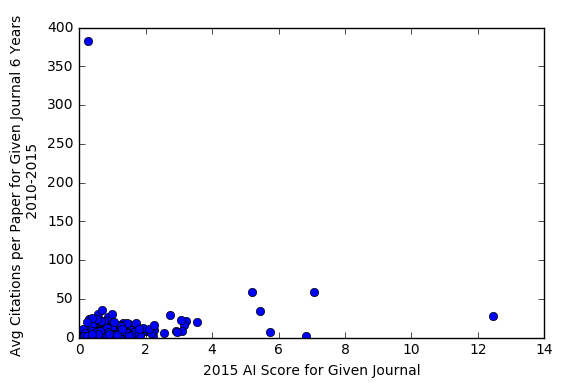

In [43]:
plt.plot(pivot_table_merged['article_influence'], pivot_table_merged['avg_cites_per_paper'], 'o')
plt.xlabel('2015 AI Score for Given Journal')
plt.ylabel('Avg Citations per Paper for Given Journal 6 Years \n 2010-2015')

plt.savefig('ai_avg_citation_5_years_scatterplot.jpg')

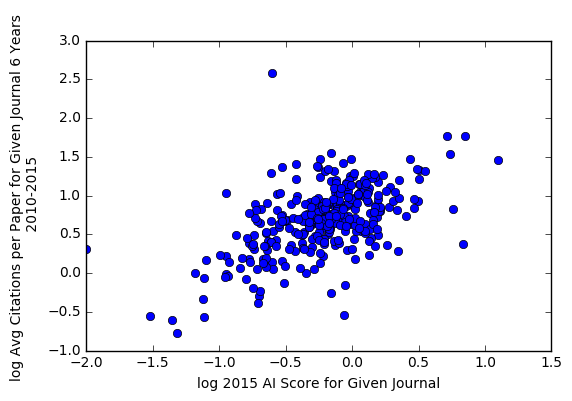

In [47]:
# Try a log log plot because of the density of most points
plt.plot(np.log10(pivot_table_merged['article_influence']), np.log10(pivot_table_merged['avg_cites_per_paper']), 'o')
plt.xlabel('log 2015 AI Score for Given Journal')
plt.ylabel('log Avg Citations per Paper for Given Journal 6 Years \n 2010-2015')

plt.savefig('ai_avg_citation_5_years_scatterplot_log_log.jpg')

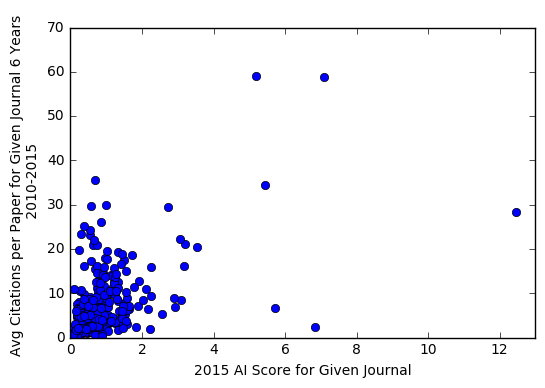

In [45]:
plt.plot(pivot_table_merged['article_influence'], pivot_table_merged['avg_cites_per_paper'], 'o')
plt.xlabel('2015 AI Score for Given Journal')
plt.ylabel('Avg Citations per Paper for Given Journal 6 Years \n 2010-2015')
plt.xlim(0,13)
plt.ylim(0,70)

plt.savefig('ai_avg_citation_5_years_scatterplot_zoomed.jpg')

In [48]:
mask = ~np.isnan(pivot_table_merged['article_influence']) & ~np.isnan(pivot_table_merged['avg_cites_per_paper'])
stats.linregress(pivot_table_merged['article_influence'][mask], pivot_table_merged['avg_cites_per_paper'][mask])

LinregressResult(slope=2.8381638747589903, intercept=5.8630182583180499, rvalue=0.14123056048556826, pvalue=0.0093246181474941313, stderr=1.0853358124970376)

Why are there NAs? What are they?

In [49]:
nan_rows = pivot_table_merged[pivot_table_merged.isnull().T.any().T]
nan_rows

,journal_name,ISSN,citation_count_sum,number_years_captured,paper_count_sum,avg_cites_per_paper,article_influence,journal_id
212,journal of genetics,0022-1333,5000.0,6.0,NaN,NaN,0.278,0022-1333
243,kybernetika,0023-5954,1542.0,6.0,NaN,NaN,0.273,0023-5954
317,revista de biologia tropical,0034-7744,3249.0,6.0,NaN,NaN,0.166,0034-7744


In [50]:
# Remove the 3 rows
pivot_table_merged = pivot_table_merged.dropna(subset=['paper_count_sum'])

In [51]:
pivot_table_merged

,journal_name,ISSN,citation_count_sum,number_years_captured,paper_count_sum,avg_cites_per_paper,article_influence,journal_id
0,acta bioethica,1726-569X,135.0,6.0,490.0,0.275510,0.030,1726-569X
1,acta botanica croatica,0365-0588,645.0,6.0,209.0,3.086124,0.181,0365-0588
2,acta medica okayama,0386-300X,2625.0,6.0,325.0,8.076923,0.230,0386-300X
3,acta medica portuguesa,1646-0758,964.0,6.0,979.0,0.984678,0.112,1646-0758
4,acta neurobiologiae experimentalis,0065-1400,4243.0,6.0,604.0,7.024834,0.506,0065-1400
5,acta scientiarum-agronomy,1807-8621,832.0,6.0,1131.0,0.735632,0.307,1807-8621
6,acta zoologica academiae scientiarum hungaricae,1217-8837,69.0,6.0,9.0,7.666667,0.187,1217-8837
7,adansonia,1280-8571,157.0,6.0,139.0,1.129496,0.193,1280-8571
8,advances in difference equations,1687-1847,2610.0,6.0,1590.0,1.641509,0.113,1687-1847
9,advances in mechanical engineering,1687-8140,1091.0,6.0,2160.0,0.505093,0.198,1687-8140


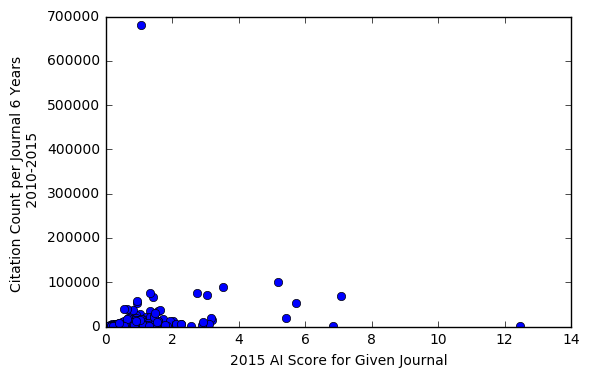

In [52]:
plt.plot(pivot_table_merged['article_influence'], 
         pivot_table_merged['citation_count_sum'], 'o')
plt.xlabel('2015 AI Score for Given Journal')
plt.ylabel('Citation Count per Journal 6 Years \n 2010-2015')


plt.savefig('ai_citation_ct_5_years_scatterplot.jpg')

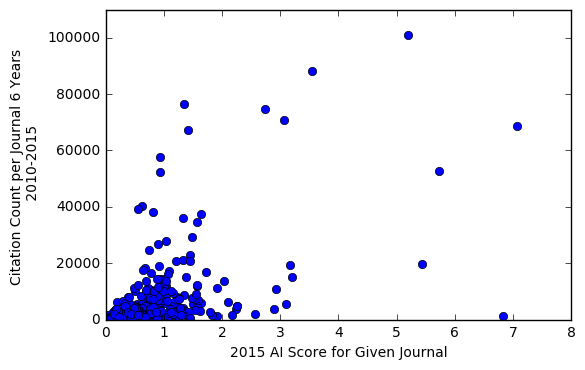

In [53]:
plt.plot(pivot_table_merged['article_influence'], 
         pivot_table_merged['citation_count_sum'], 'o')
plt.xlabel('2015 AI Score for Given Journal')
plt.ylabel('Citation Count per Journal 6 Years \n 2010-2015')
plt.ylim(0,110000)
plt.xlim(0, 8)
plt.savefig('ai_citation_ct_5_years_scatterplot_zoomed.jpg')

In [55]:
stats.linregress(np.log10(pivot_table_merged['article_influence']), np.log10(pivot_table_merged['citation_count_sum']))

LinregressResult(slope=0.95968708627030619, intercept=3.6813869181378762, rvalue=0.59053941374286478, pvalue=3.7664268469984426e-33, stderr=0.07154666474935821)

In [56]:
# Set seed for reproducibility
np.random.seed(72117)
# Split dataframe into test (20%) and train (80%)
pt_train, pt_test = train_test_split(pivot_table_merged, test_size = 0.20)

In [57]:
# Run linear regression with three features
pt_lr = smf.ols(formula=
                   'article_influence ~ citation_count_sum + paper_count_sum + avg_cites_per_paper', 
                data=pt_train).fit()
# Create an array of predictions for the training and testing data
pt_train_pred = pt_lr.predict(pt_train)
pt_test_pred = pt_lr.predict(pt_test)

In [58]:
# Output results of linear regression
pt_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      article_influence   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     28.42
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           5.70e-16
Time:                        14:52:40   Log-Likelihood:                -327.13
No. Observations:                 270   AIC:                             662.3
Df Residuals:                     266   BIC:                             676.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               0.7913      0.054     14.638      0.000         0.685     0.898
citation_count_sum   4.149e-05   4.67e-06      8.879      0.000      3.23e-05  5.07e-05
paper_count_sum        -0.0002   2.42e-05     -8.352      0.000        -0.000    -0.000
avg_cites_per_paper     0.0007      0.002      0.328      0.743        -0.003     0.005
==============================================================================
Omnibus:                      227.377   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3689.001
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                      19.792   Cond. No.                     4.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# Calculate the RMSE of the testing actual values versus predicted values
np.sqrt(mean_squared_error(pt_test['article_influence'], pt_test_pred))

1.4733898156917509

In [62]:
# Run linear regression with three features
pt_log_lr = smf.ols(formula=
                   'np.log10(article_influence) ~ np.log10(citation_count_sum) + np.log10(paper_count_sum) + np.log10(avg_cites_per_paper)', 
                data=pt_train).fit()
# Create an array of predictions for the training and testing data
pt_log_train_pred = pt_log_lr.predict(pt_train)
pt_log_test_pred = pt_log_lr.predict(pt_test)

In [63]:
# Output results of linear regression
pt_log_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log10(article_influence)   R-squared:                       0.431
Model:                                     OLS   Adj. R-squared:                  0.427
Method:                          Least Squares   F-statistic:                     101.3
Date:                         Sun, 23 Jul 2017   Prob (F-statistic):           1.81e-33
Time:                                 14:55:20   Log-Likelihood:                -58.450
No. Observations:                          270   AIC:                             122.9
Df Residuals:                              267   BIC:                             133.7
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                        -1.3705      0.105    -13.069      0.000        -1.577    -1.164
np.log10(citation_count_sum)      0.2754      0.020     14.047      0.000         0.237     0.314
np.log10(paper_count_sum)         0.0010      0.025      0.038      0.970        -0.048     0.050
np.log10(avg_cites_per_paper)     0.2744      0.029      9.438      0.000         0.217     0.332
==============================================================================
Omnibus:                       26.311   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.344
Skew:                          -0.158   Prob(JB):                     6.64e-25
Kurtosis:                       6.130   Cond. No.                     1.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
# Calculate the RMSE of the log of testing actual values versus predicted (log) values
np.sqrt(mean_squared_error(np.log10(pt_test['article_influence']), pt_log_test_pred))

0.26789073541337655

In [68]:
import math
math.pow(10,0.27)

1.8620871366628675

In [69]:
# Run linear regression with two features
pt_log_lr2 = smf.ols(formula=
                   'np.log10(article_influence) ~ np.log10(citation_count_sum) + np.log10(avg_cites_per_paper)', 
                data=pt_train).fit()
# Create an array of predictions for the training and testing data
pt_log_train_pred2 = pt_log_lr2.predict(pt_train)
pt_log_test_pred2 = pt_log_lr2.predict(pt_test)

In [70]:
# Output results of linear regression
pt_log_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log10(article_influence)   R-squared:                       0.431
Model:                                     OLS   Adj. R-squared:                  0.427
Method:                          Least Squares   F-statistic:                     101.3
Date:                         Sun, 23 Jul 2017   Prob (F-statistic):           1.81e-33
Time:                                 15:00:17   Log-Likelihood:                -58.450
No. Observations:                          270   AIC:                             122.9
Df Residuals:                              267   BIC:                             133.7
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                        -1.3705      0.105    -13.069      0.000        -1.577    -1.164
np.log10(citation_count_sum)      0.2763      0.034      8.086      0.000         0.209     0.344
np.log10(avg_cites_per_paper)     0.2735      0.051      5.414      0.000         0.174     0.373
==============================================================================
Omnibus:                       26.311   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.344
Skew:                          -0.158   Prob(JB):                     6.64e-25
Kurtosis:                       6.130   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Calculate the RMSE of the log of testing actual values versus predicted (log) values
np.sqrt(mean_squared_error(np.log10(pt_test['article_influence']), pt_log_test_pred2))

0.26789073541337666

In [73]:
# Run linear regression with two features
pt_log_lr3 = smf.ols(formula=
                   'np.log10(article_influence) ~ np.log10(avg_cites_per_paper)', 
                data=pt_train).fit()
# Create an array of predictions for the training and testing data
pt_log_train_pred3 = pt_log_lr3.predict(pt_train)
pt_log_test_pred3 = pt_log_lr3.predict(pt_test)

# Output results of linear regression
pt_log_lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log10(article_influence)   R-squared:                       0.292
Model:                                     OLS   Adj. R-squared:                  0.290
Method:                          Least Squares   F-statistic:                     110.7
Date:                         Sun, 23 Jul 2017   Prob (F-statistic):           6.84e-22
Time:                                 15:02:27   Log-Likelihood:                -88.022
No. Observations:                          270   AIC:                             180.0
Df Residuals:                              268   BIC:                             187.2
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept                        -0.5701      0.039    -14.781      0.000        -0.646    -0.494
np.log10(avg_cites_per_paper)     0.4961      0.047     10.520      0.000         0.403     0.589
==============================================================================
Omnibus:                       24.617   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.262
Skew:                          -0.358   Prob(JB):                     2.48e-15
Kurtosis:                       5.338   Cond. No.                         3.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Calculate the RMSE of the log of testing actual values versus predicted (log) values
np.sqrt(mean_squared_error(np.log10(pt_test['article_influence']), pt_log_test_pred3))

0.26596710783312943

In [75]:
math.pow(10,0.265)

1.840772001468956